# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [2]:
dataset = pd.read_csv('Car details v3.csv')
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
dataset.shape

(8128, 13)

# Cleaning the dataset

### Deleting missing values

In [4]:
# counting missing values
dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
# deleting the rows with missing values
dataset = dataset.dropna()

In [6]:
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [7]:
dataset.shape
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [8]:
import re

### Creating new torque_rpm column without only numeric values

In [11]:
torque_list = dataset["torque"].to_list()
torque_rpm = []
def extraction_torque(x):
    for i in x:
        res = i.replace(",","")
        temp = [int(s) for s in re.findall(r'\d+', res)]
        torque_rpm.append(max(temp))
        
extraction_torque(torque_list)
print(torque_rpm[:2])

[2000, 2500]


In [12]:
dataset['torque_rpm'] = torque_rpm
dataset.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


### extracting mileage column

In [13]:
# extracting mileage
mil_list = dataset['mileage'].to_list()
mil_kmpl = []
def extraction_mil(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extraction_mil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [14]:
dataset['mil_kmpl'] = mil_kmpl
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,16.10


In [15]:
engine_list = dataset['engine'].to_list()
engine_cc = []
def extraction_engine(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        engine_cc.append(max(temp))

extraction_engine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [16]:
dataset['engine_cc'] = engine_cc
dataset.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


In [17]:
# for max power 
max_power_list = dataset['max_power'].to_list()
max_power_bhp = []

def extraction_maxpower(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        max_power_bhp.append(max(temp))
        
extraction_maxpower(max_power_list)
print(max_power_list[:2])
print(max_power_bhp[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [18]:
dataset["max_power_bhp"] = max_power_bhp
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,16.10,1298.0,88.20


In [19]:
# so now let us create a new set dataframe with the text columns deleted
data_new = dataset.drop(["mileage","engine","max_power","torque"], axis = 1)
data_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20


In [20]:
data_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_bhp
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3069.864154,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,943.662100,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2400.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,21800.000000,42.000000,3604.000000,400.000000


<AxesSubplot:>

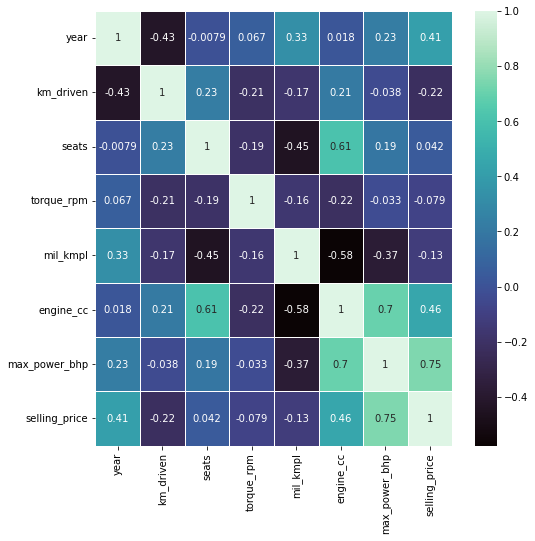

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(data_new.corr(),annot=True,cmap='mako',linewidths=.5)

# Splitting the dataset

### input and output

In [22]:
data_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20


In [23]:
df = data_new.pop('selling_price')
data_new['selling_price'] = df

In [24]:
x = data_new.iloc[:,1:-1].values
y = data_new.iloc[:,-1].values

In [25]:
print(data_new['fuel'].value_counts())
print(data_new['seller_type'].value_counts())
print(data_new['transmission'].value_counts())
print(data_new['owner'].value_counts())
print(data_new['name'].value_counts())

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       6865
Automatic    1041
Name: transmission, dtype: int64
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV    

In [44]:
data_new.head()
data_new.to_csv('data.csv', index=False)

# Encoding categorical variables

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
ct_fuel = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[2,3,4,5])], remainder='passthrough')
x = np.array(ct_fuel.fit_transform(x))
# we have encoded the categorical variables

In [29]:
print(x[:2])
print(y[:2])

[[0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 2014 145500 5.0
  2000 23.4 1248.0 74.0]
 [0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 2014 120000 5.0
  2500 21.14 1498.0 103.52]]
[450000 370000]


In [30]:
len(x)

7906

# Splitting the dataset into training and test set

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9, random_state=0)

# Training the random forest regression model on the training set

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

# Predicting the test set values

In [33]:
predictions = regressor.predict(x_test)

In [34]:
np.set_printoptions(precision= 2)
np.concatenate((y_test.reshape(len(y_test),1), predictions.reshape(len(predictions),1)),1)

array([[430000.  , 417729.97],
       [779000.  , 779000.  ],
       [200000.  , 187479.98],
       ...,
       [869999.  , 768409.99],
       [385000.  , 370079.17],
       [ 86000.  ,  90059.57]])

# Evaluating the model performance

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9712291726949527